In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
rainfall_values = [21, 20, 19, 18, 17, 16, 15, 14, 13, 12]
area_values = [543, 1345, 2030, 2545, 2955, 3280, 3535, 3710, 3880, 3915 ]


# Create a DataFrame with the desired column name
df = pd.DataFrame({'Rainfall(mm)': rainfall_values})
df['Area(sqkm)'] = area_values

In [4]:

#incremental area
df['Incremental_Area'] = df['Area(sqkm)'].diff()
df['Incremental_Area'].iloc[0] = df['Area(sqkm)'].iloc[0]

#incremental average rain
df['Inc_avg_rain'] = df['Rainfall(mm)'].rolling(window=2).mean()
df['Inc_avg_rain'].iloc[0] = df['Rainfall(mm)'].iloc[0]  # Set the first row to the same value as "Rainfall (mm)"

#rainfall volume: Incremental_Area x Inc_avg_rain
df['Rainfall_volume']=df['Incremental_Area']*df['Inc_avg_rain']

#cumulative volume
df['Cumulative_vol'] = df['Rainfall_volume'].cumsum()
df['Cumulative_vol'].iloc[0] = df['Rainfall_volume'].iloc[0]

#Equivalent uniform depths: cumulative volume / area
df['EUD(mm)'] = df['Cumulative_vol']/df['Area(sqkm)']
df

,Rainfall(mm),Area(sqkm),Incremental_Area,Inc_avg_rain,Rainfall_volume,Cumulative_vol,EUD(mm)
0,21,543,543.0,21.0,11403.0,11403.0,21.000000
1,20,1345,802.0,20.5,16441.0,27844.0,20.701859
2,19,2030,685.0,19.5,13357.5,41201.5,20.296305
3,18,2545,515.0,18.5,9527.5,50729.0,19.932809
4,17,2955,410.0,17.5,7175.0,57904.0,19.595262
5,16,3280,325.0,16.5,5362.5,63266.5,19.288567
6,15,3535,255.0,15.5,3952.5,67219.0,19.015276
7,14,3710,175.0,14.5,2537.5,69756.5,18.802291
8,13,3880,170.0,13.5,2295.0,72051.5,18.569974
9,12,3915,35.0,12.5,437.5,72489.0,18.515709



- Equivalent uniform depth (EUD) of rainfall is the depth of rainfall that would produce the same runoff volume as the actual rainfall distribution. It is a useful concept for designing and operating drainage systems, as it allows engineers to simplify complex rainfall distributions into a single value.

- There are a number of ways to calculate EUD, but the most common method is to use the Thiessen polygon method. This method involves dividing the catchment area into a number of polygons, with each polygon centered on a rain gauge station. The area of each polygon is then used to calculate a weighted average of the rainfall depths at the rain gauge stations. The EUD is then calculated as the sum of the weighted average rainfall depths for all of the polygons.

- Another method for calculating EUD is to use the isohyetal method. This method involves drawing lines on a map connecting points of equal rainfall depth. The catchment area is then divided into a number of zones, with each zone defined by two isohyetal lines. The EUD is then calculated as the average of the rainfall depths in all of the zones.

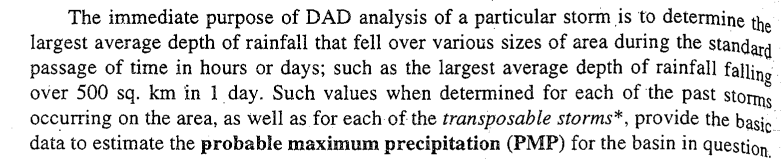

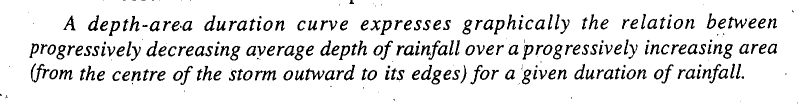